### Telecom Customer Churn Analysis

#### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Importing telecom data
telecom = pd.read_csv('telecom_churn_data.csv')

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,...,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Filter high-value customers

 High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [3]:
print("Shape of dataframe before:", telecom.shape)

telecom['av_rech_amt_data_6']=np.where(telecom['av_rech_amt_data_6'].isnull(),0,telecom['av_rech_amt_data_6'])
telecom['total_rech_data_6']=np.where(telecom['total_rech_data_6'].isnull(),0,telecom['total_rech_data_6'])
telecom['av_rech_amt_data_7']=np.where(telecom['av_rech_amt_data_7'].isnull(),0,telecom['av_rech_amt_data_7'])
telecom['total_rech_data_7']=np.where(telecom['total_rech_data_7'].isnull(),0,telecom['total_rech_data_7'])

telecom['avg_rech_amt_6_and_7'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7+
                                  (telecom.av_rech_amt_data_6*telecom.total_rech_data_6)+
                                   (telecom.av_rech_amt_data_7*telecom.total_rech_data_7))/2

telecom = telecom[telecom.avg_rech_amt_6_and_7 >= telecom.avg_rech_amt_6_and_7.quantile(0.7)]

# Drop avg_rech_amt_6_and_7 as this can be derived from total_rech_amt_6 and total_rech_amt_7
telecom.drop('avg_rech_amt_6_and_7', axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (99999, 226)
Shape of dataframe after: (30001, 226)


### Tag churners and remove attributes of the churn phase

In [4]:
# Tag churners

print("Shape of dataframe before:", telecom.shape)
telecom['churn'] = 1

telecom.loc[(telecom.total_ic_mou_9 != 0) & (telecom.total_og_mou_9 != 0) &
            (telecom.total_og_mou_9 != 0) & (telecom.total_og_mou_9 != 0), 'churn'] = 0 
print("Shape of dataframe after:", telecom.shape)
telecom.head()

Shape of dataframe before: (30001, 226)
Shape of dataframe after: (30001, 227)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,...,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,NaN,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0


In [5]:
# Removing attributes corresponding to the churn phase

print("Shape of dataframe before:", telecom.shape)
col_to_be_droped = []
for col in list(telecom.columns.values):
    if (col.endswith("_9") | col.startswith("sep_")):
        col_to_be_droped.append(col)

telecom.drop(col_to_be_droped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 227)
Shape of dataframe after: (30001, 172)


## Data cleaning

In [6]:
# Checking the number of unique values in each column
telecom.nunique().sort_values()

std_ic_t2o_mou_6                1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
std_ic_t2o_mou_8                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
std_ic_t2o_mou_7                1
night_pck_user_6                2
night_pck_user_7                2
night_pck_user_8                2
churn                           2
fb_user_6                       2
fb_user_8                       2
fb_user_7                       2
monthly_2g_6                    5
monthly_2g_8                    6
monthly_2g_7                    6
monthly_3g_6                   12
monthly_3g_8                   12
monthly_3g_7                   15
sachet_3g_6                    25
count_rech_3g_6                25
sachet_3g_7                    27
count_rech_3g_

### Dropping variables 
<br> Dropping the following variables :
1. mobile_number : unique identification of a customer
2. circle_id : same value for all customers
3. Unique element count of following variables is 1 <br>
           
    - circle_id 
    
    - loc_og_t2o_mou 
    - loc_ic_t2o_mou
    - std_og_t2o_mou                 

    - last_date_of_month_6            
    - last_date_of_month_7            
    - last_date_of_month_8           

    - std_og_t2c_mou_6 
    - std_og_t2c_mou_7
    - std_og_t2c_mou_8                

    - std_ic_t2o_mou_6
    - std_ic_t2o_mou_7
    - std_ic_t2o_mou_8 
4. Date of last recharges as they don't add value
 

In [7]:
print("Shape of dataframe before:", telecom.shape)

# Droping columns whose unique element count is 1
col_to_be_dropped = ['loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou',\
                     'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',\
                     'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',\
                     'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',\
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

# Dropping mobile_number which is unique for every record
col_to_be_dropped.append('mobile_number')

# Dropping circle id which is same for all records
col_to_be_dropped.append('circle_id')

telecom.drop(col_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 172)
Shape of dataframe after: (30001, 155)


In [8]:
# List out all the columns
#list(telecom)

## Derived variables

> On analyzing the data, the following observations were made (Same apply for 7th and 8th month columns)
<pre>
loc_og_mou_6   = (loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6)
std_og_mou_6   = (std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6)
total_og_mou_6 = (loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6)
loc_ic_mou_6   = (loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6)
std_ic_mou_6   = (std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6)
total_ic_mou_6 = (loc_ic_mou_6 + std_ic_mou_6 + spl_ic_mou_6 + isd_ic_mou_6 + ic_others_6)
total_rech_data_6= count_rech_2g_6+count_rech_3g_6
</pre>
>Let's drop the features on the right side of the equation above as they can be expressed as their totals given on the left-hand side:
<pre>
   loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,
   loc_og_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,
   loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,loc_ic_mou_6,std_ic_mou_6,spl_ic_mou_6,
   isd_ic_mou_6,ic_others_6,count_rech_2g_6,count_rech_3g_6
   ( + Variables for 7th and 8th months )

</pre>

In [9]:
#verifying the below equations:
#loc_og_mou_6   = (loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6)
#std_og_mou_6   = (std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6)
#loc_ic_mou_6   = (loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6)
#std_ic_mou_6   = (std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6)


telecom['loc_og_mou_6_calculated'] = telecom['loc_og_t2t_mou_6']+telecom['loc_og_t2m_mou_6']+telecom['loc_og_t2f_mou_6']+telecom['loc_og_t2c_mou_6']
telecom['std_og_mou_6_calculated'] = telecom['std_og_t2t_mou_6']+telecom['std_og_t2m_mou_6']+telecom['std_og_t2f_mou_6']
telecom['std_ic_mou_6_calculated'] = telecom['std_ic_t2t_mou_6']+telecom['std_ic_t2m_mou_6']+telecom['std_ic_t2f_mou_6']
telecom['loc_ic_mou_6_calculated'] = telecom['loc_ic_t2t_mou_6']+telecom['loc_ic_t2m_mou_6']+telecom['loc_ic_t2f_mou_6']

telecom[['loc_og_mou_6_calculated','loc_og_mou_6','std_og_mou_6_calculated','std_og_mou_6','std_ic_mou_6_calculated','std_ic_mou_6','loc_ic_mou_6_calculated','loc_ic_mou_6']].head(10)


,loc_og_mou_6_calculated,loc_og_mou_6,std_og_mou_6_calculated,std_og_mou_6,std_ic_mou_6_calculated,std_ic_mou_6,loc_ic_mou_6_calculated,loc_ic_mou_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,422.15,422.16,60.85,60.86,180.52,180.54,427.86,427.88
8,378.09,378.09,130.25,130.26,22.43,22.43,81.42,81.43
21,97.04,97.04,763.29,763.29,81.75,81.76,125.32,125.33
23,131.90,131.91,2.36,2.36,2.94,2.94,116.62,116.63
33,0.00,0.00,0.00,0.00,3.18,3.18,3.48,3.48
38,63.64,63.64,274.20,274.21,24.10,24.11,46.67,46.68
41,283.22,283.24,34.68,34.68,0.00,0.00,83.42,83.43
48,1642.62,1642.58,1506.80,1506.81,38.15,38.16,1212.37,1212.39
53,359.66,357.03,30.66,30.66,255.14,255.14,592.08,592.09


In [10]:
#Verifying the below equations:
#total_og_mou_6 = (loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6)
#total_ic_mou_6 = (loc_ic_mou_6 + std_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6)
#total_rech_data_6= count_rech_2g_6+count_rech_3g_6

telecom['total_og_mou_6_calculated'] = telecom['loc_og_mou_6']+telecom['std_og_mou_6']+telecom['isd_og_mou_6']+telecom['spl_og_mou_6']+telecom['og_others_6']
telecom['total_ic_mou_6_calculated'] = telecom['loc_ic_mou_6'] + telecom['std_ic_mou_6']+ telecom['spl_ic_mou_6']+ telecom['isd_ic_mou_6']+telecom['ic_others_6']
telecom['total_rech_data_6_calculated'] = telecom['count_rech_2g_6'] + telecom['count_rech_3g_6']

telecom[['total_og_mou_6_calculated','total_og_mou_6','total_ic_mou_6_calculated','total_ic_mou_6','total_rech_data_6_calculated','total_rech_data_6' ]].head(10)

,total_og_mou_6_calculated,total_og_mou_6,total_ic_mou_6_calculated,total_ic_mou_6,total_rech_data_6_calculated,total_rech_data_6
0,NaN,0.00,NaN,0.00,1.0,1.0
7,487.52,487.53,626.43,626.46,NaN,0.0
8,508.35,508.36,103.86,103.86,NaN,0.0
21,860.33,860.34,207.09,207.09,NaN,0.0
23,134.37,134.38,119.57,119.58,NaN,0.0
33,0.00,0.00,7.89,7.89,5.0,5.0
38,337.85,337.86,70.79,70.79,NaN,0.0
41,318.74,318.76,278.30,278.31,NaN,0.0
48,3152.42,3152.43,1250.55,1250.56,NaN,0.0
53,614.44,614.46,847.76,847.78,4.0,4.0


In [11]:
print("Shape of dataframe before:", telecom.shape)
cols_to_be_droped_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','std_og_t2t_mou_6',
                    'std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_mou_6','std_og_mou_6',
                    'isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6',
                    'loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_mou_6',
                    'std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6','count_rech_2g_6','count_rech_3g_6']

cols_to_be_droped_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','std_og_t2t_mou_7',
                    'std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_mou_7','std_og_mou_7',
                    'isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7',
                    'loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_mou_7',
                    'std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7','count_rech_2g_7','count_rech_3g_7']

cols_to_be_droped_8 = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_8',
                    'std_og_t2m_mou_8','std_og_t2f_mou_8','loc_og_mou_8','std_og_mou_8',
                    'isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8',
                    'loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','loc_ic_mou_8',
                    'std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8','count_rech_2g_8','count_rech_3g_8']

calculated_cols = ['loc_og_mou_6_calculated','std_og_mou_6_calculated','std_ic_mou_6_calculated','loc_ic_mou_6_calculated',\
                    'total_og_mou_6_calculated','total_ic_mou_6_calculated','total_rech_data_6_calculated']

cols_to_be_droped = cols_to_be_droped_6 + cols_to_be_droped_7 + cols_to_be_droped_8 + calculated_cols
print(len(cols_to_be_droped) )                                 
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)


Shape of dataframe before: (30001, 162)
79
Shape of dataframe after: (30001, 83)


In [12]:
#list(telecom)

### avg_arpu_6_7 : _Average revenue per user for months 6 and 7_ 
### Total_arpu_8 : _Total revenue per user for month 8_


In [13]:
# Deriving average arpu for both call and data for the months 6,7 and total for month 8  
telecom['avg_arpu_6_7'] = (telecom['arpu_6'] + telecom['arpu_7'] + telecom['arpu_2g_6'] + telecom['arpu_2g_7'] + telecom['arpu_3g_6'] + telecom['arpu_3g_7'])/2 
telecom['total_arpu_8'] = telecom['arpu_8'] + telecom['arpu_2g_8'] + telecom['arpu_3g_8']

# Dropping the individual arpu columns as they are now redundant
cols_to_be_droped = ['arpu_6','arpu_7','arpu_2g_6','arpu_2g_7','arpu_3g_6','arpu_3g_7','arpu_8','arpu_2g_8',\
                     'arpu_3g_8']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 76)

### avg_loc_og_t2c_mou_6_7 : _Average local calls to customer care for months 6 and 7_ 

In [14]:
# Deriving average local calls to customer care for months 6 and 7
telecom['avg_loc_og_t2c_mou_6_7'] = (telecom['loc_og_t2c_mou_6'] + telecom['loc_og_t2c_mou_7'])/2 

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['loc_og_t2c_mou_6','loc_og_t2c_mou_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape


(30001, 75)

### avg_og_mou_6_7 : _Average of total local outgoing minutes of usage across operators for months 6 , 7_

In [15]:
# Deriving average of total local outgoing minutues of usage for both call and data for the months 6,7 and total for month 8 
telecom['avg_og_mou_6_7'] = (telecom['total_og_mou_6'] + telecom['total_og_mou_7'])/2


# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['total_og_mou_6','total_og_mou_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 74)

### avg_og_mou_6_7 : _Average of total local incoming minutes of usage across operators for months 6 , 7_


In [16]:
# Deriving average of total local incoming minutues of usage for both call and data for the months 6,7 and total for month 8 
telecom['avg_ic_mou_6_7'] = (telecom['total_ic_mou_6'] + telecom['total_ic_mou_7'])/2


# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['total_ic_mou_6','total_ic_mou_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 73)

### avg_onnet_mou_6_7 : _Average calls on the same operator network for months 6 and 7
### avg_offnet_mou_6_7  : _Average calls outside the operator network for months 6 and 7_

In [17]:
# Deriving average calls on same and outside operator networks  for months 6 and 7 
telecom['avg_onnet_mou_6_7'] = (telecom['onnet_mou_6'] + telecom['onnet_mou_7'])/2 
telecom['avg_offnet_mou_6_7'] = (telecom['offnet_mou_6'] + telecom['offnet_mou_7'])/2

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 71)

### avg_rech_num_6_7 : _Average of the total number of recharges for months 6 and 7

In [18]:
# Deriving average of the total number of recharges for months 6 and 7
telecom['avg_rech_num_6_7'] = (telecom['total_rech_num_6'] + telecom['total_rech_num_7'])/2 

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['total_rech_num_6','total_rech_num_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape



(30001, 70)

### avg_rech_amt_6_7 : _Average of the recharge amounts for months 6 and 7

In [19]:
# Deriving average of the recharge amounts for months 6 and 7
telecom['avg_rech_amt_6_7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2 

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['total_rech_amt_6','total_rech_amt_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 69)

### avg_max_rech_amt_6_7 : _Average of the max recharge amounts for months 6 and 7

In [20]:
# Deriving average of the max recharge amounts for months 6 and 7
telecom['avg_max_rech_amt_6_7'] = (telecom['max_rech_amt_6'] + telecom['max_rech_amt_7'])/2 

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['max_rech_amt_6','max_rech_amt_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape


(30001, 68)

### avg_rech_amt_data_6_7 : _Average of the data recharge amounts for months 6 and 7

In [21]:
# Deriving average of the data recharge amounts for months 6 and 7
telecom['avg_rech_amt_data_6_7'] = (telecom['av_rech_amt_data_6'] + telecom['av_rech_amt_data_7'])/2 

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['av_rech_amt_data_6','av_rech_amt_data_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape


(30001, 67)

### avg_roam_ic_mou_6_7 : _Average incoming roaming minutues of usage for months 6 and 7_
### avg_roam_og_mou_6_7 : _Average outgoing roaming minutues of usage for months 6 and 7_

In [22]:
# Deriving average incoming and outgoing roaming minutues of usage for months 6 and 7
telecom['avg_roam_ic_mou_6_7'] = (telecom['roam_ic_mou_6'] + telecom['roam_ic_mou_7'])/2 
telecom['avg_roam_og_mou_6_7'] = (telecom['roam_og_mou_6'] + telecom['roam_og_mou_7'])/2

# Dropping the individual arpu columns as they are now redundant
cols_to_be_droped = ['roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 65)

### avg_vol_mb_6_7 : _Average mobile internet usage in mb for months 6 and 7_
### total_vol_mb_8 : _Average mobile internet usage in mb for month 8_

In [23]:
# Deriving average mobile internet usage in mb for months 6,7 and total mobile internet usage in mb for month 8
telecom['avg_vol_mb_6_7'] = (telecom['vol_2g_mb_6'] + telecom['vol_2g_mb_7']+ telecom['vol_3g_mb_6'] + telecom['vol_3g_mb_7'])/2 
telecom['total_vol_mb_8'] = (telecom['vol_2g_mb_8'] + telecom['vol_3g_mb_8'])

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape


(30001, 61)

### avg_monthly_data_6_7 : _Average monthly data schemes for months 6 , 7_
### total_monthly_data_8 : _Total monthly data schemes for month 8_

In [24]:
# Deriving average monthly data schemes for months 6,7 and total schemes for month 8 for both 2g and 3g
telecom['avg_monthly_data_6_7'] = (telecom['monthly_2g_6'] + telecom['monthly_2g_7'] + \
                                telecom['monthly_3g_6'] + telecom['monthly_3g_7'])/2  

telecom['total_monthly_data_8'] = telecom['monthly_2g_8'] + telecom['monthly_3g_8'] 
                                

# Dropping the individual arpu columns as they are now redundant
cols_to_be_droped = ['monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7',\
                     'monthly_2g_8','monthly_3g_8']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 57)

### avg_sachet_data_6_7 : _Average sachet data schemes for months 6 , 7_
### Total_sachet_data_8 :  _Total  sachet data schemes for month 8_

In [25]:
# Deriving average monthly data schemes for months 6,7 and total schemes for month 8 for both 2g and 3g
telecom['avg_sachet_data_6_7'] = (telecom['sachet_2g_6'] + telecom['sachet_2g_7'] + \
                                telecom['sachet_3g_6'] + telecom['sachet_3g_7'])/2  

telecom['total_sachet_data_8'] = telecom['sachet_2g_8'] + telecom['sachet_3g_8'] 
                                

# Dropping the individual arpu columns as they are now redundant
cols_to_be_droped = ['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7',\
                     'sachet_2g_8','sachet_3g_8']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 53)

### avg_rech_data_6_7 : _Average of total data recharges for 2g & 3g for months 6 , 7_


In [26]:
# Deriving average of total data recharges for 2g & 3g for months 6 and 7
telecom['avg_rech_data_6_7'] = (telecom['total_rech_data_6'] + telecom['total_rech_data_7'])/2  


# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['total_rech_data_6','total_rech_data_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 52)

### av_max_rech_data_6_7 : _Average of max data recharge for months 6 & 7_

In [27]:
# Deriving average of max data recharge for months 6 and 7
telecom['av_max_rech_data_6_7'] = (telecom['max_rech_data_6'] + telecom['max_rech_data_7'])/2  

# Dropping the individual columns as they are now redundant
cols_to_be_droped = ['max_rech_data_6','max_rech_data_7']
telecom.drop(cols_to_be_droped, axis=1, inplace=True)
telecom.shape

(30001, 51)

In [28]:
list(telecom)

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn',
 'avg_arpu_6_7',
 'total_arpu_8',
 'avg_loc_og_t2c_mou_6_7',
 'avg_og_mou_6_7',
 'avg_ic_mou_6_7',
 'avg_onnet_mou_6_7',
 'avg_offnet_mou_6_7',
 'avg_rech_num_6_7',
 'avg_rech_amt_6_7',
 'avg_max_rech_amt_6_7',
 'avg_rech_amt_data_6_7',
 'avg_roam_ic_mou_6_7',
 'avg_roam_og_mou_6_7',
 'avg_vol_mb_6_7',
 'total_vol_mb_8',
 'avg_monthly_data_6_7',
 'total_monthly_data_8',
 'avg_sachet_data_6_7',
 'total_sachet_data_8',
 

## Missing value treatment

In [29]:
# Checking the % of missing values in each column
missing_col_values = (((telecom.isnull() | telecom.isna()).sum() * 100 / telecom.index.size).round(2))
missing_col_values.sort_values(ascending=False)

av_max_rech_data_6_7        52.29
avg_arpu_6_7                52.29
max_rech_data_8             46.83
date_of_last_rech_data_8    46.83
fb_user_8                   46.83
night_pck_user_8            46.83
av_rech_amt_data_8          46.83
total_arpu_8                46.83
total_rech_data_8           46.83
date_of_last_rech_data_6    44.15
night_pck_user_6            44.15
fb_user_6                   44.15
date_of_last_rech_data_7    43.15
night_pck_user_7            43.15
fb_user_7                   43.15
roam_ic_mou_8                3.91
loc_og_t2c_mou_8             3.91
roam_og_mou_8                3.91
offnet_mou_8                 3.91
onnet_mou_8                  3.91
avg_loc_og_t2c_mou_6_7       2.61
avg_onnet_mou_6_7            2.61
avg_roam_ic_mou_6_7          2.61
avg_offnet_mou_6_7           2.61
avg_roam_og_mou_6_7          2.61
avg_rech_data_6_7            0.00
avg_og_mou_6_7               0.00
total_sachet_data_8          0.00
avg_sachet_data_6_7          0.00
total_monthly_

### Data distribution of columns with more than 40% values missing

#### av_max_rech_data_6_7 & max_rech_data_8

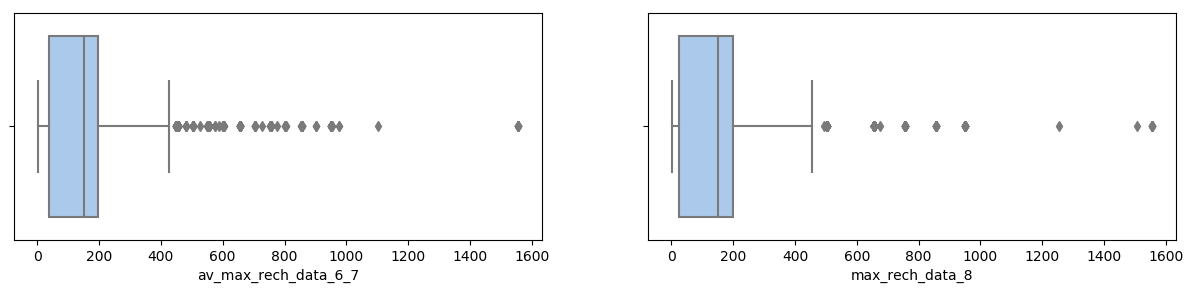

In [30]:
#Plot distribution for total_count_data_rech_6_7
f, (x1,x2) = plt.subplots(1, 2, figsize=(15, 3),  dpi=100)
sns.boxplot(x="av_max_rech_data_6_7", data=telecom, ax=x1, palette="pastel");
sns.boxplot(x="max_rech_data_8", data=telecom, ax=x2, palette="pastel");

In [31]:
#Get relevant percentiles for av_max_rech_data_6_7 and max_rech_data_8 to see their distribution
telecom[['av_max_rech_data_6_7','max_rech_data_8']].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,av_max_rech_data_6_7,max_rech_data_8
0.0,1.0,1.0
0.1,25.0,23.0
0.2,25.0,25.0
0.3,63.0,25.0
0.4,105.0,98.0
0.5,152.0,152.0
0.6,154.0,154.0
0.7,176.0,179.0
0.8,203.0,252.0
0.9,252.0,252.0


#### Dropping av_max_rech_data_6_7 & max_rech_data_8

>av_max_rech_data_6_7 & max_rech_data_8 have a lot of variation and imputing close to 50% of them with some value might introduce a lot of bias 

In [32]:
print("Shape of dataframe before:", telecom.shape)

cols_to_be_dropped = ['av_max_rech_data_6_7','max_rech_data_8']

telecom.drop(cols_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 51)
Shape of dataframe after: (30001, 49)


#### Dropping date_of_last_rech_data_6, date_of_last_rech_data_7 & date_of_last_rech_data_8

> date_of_last_rech_data_6, date_of_last_rech_data_7 & date_of_last_rech_data_8 are unique values of dates based on users and doesn't add much value

In [33]:
print("Shape of dataframe before:", telecom.shape)

cols_to_be_dropped = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

telecom.drop(cols_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 49)
Shape of dataframe after: (30001, 46)


#### avg_arpu_6_7 & total_arpu_8

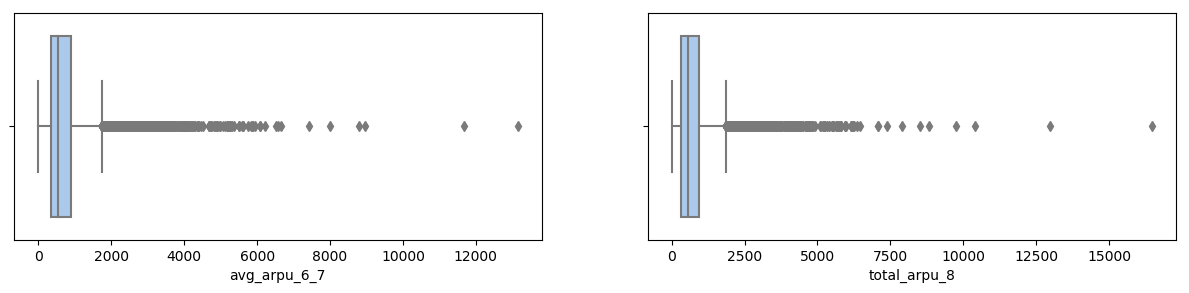

In [34]:
#Plot distribution for avg_arpu_6_7 & total_arpu_8
f, (x1,x2) = plt.subplots(1, 2, figsize=(15, 3),  dpi=100)
sns.boxplot(x="avg_arpu_6_7", data=telecom, ax=x1, palette="pastel");
sns.boxplot(x="total_arpu_8", data=telecom, ax=x2, palette="pastel");

In [35]:
#Get relevant percentiles for avg_arpu_6_7 and total_arpu_8 to see their distribution
telecom[['avg_arpu_6_7','total_arpu_8']].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,avg_arpu_6_7,total_arpu_8
0.0,-23.7085,0.0000
0.1,209.9002,169.7250
0.2,295.1686,265.0058
0.3,369.7668,356.8236
0.4,447.4878,449.2394
0.5,541.2220,555.1190
0.6,652.4593,671.8284
0.7,797.0770,828.2632
0.8,1003.8655,1066.3008
0.9,1407.6296,1532.5902


#### Dropping avg_arpu_6_7 & total_arpu_8

> - avg_arpu_6_7 & total_arpu_8 have uniform variation and imputing ~50% of them with some value might introduce a lot of bias
> - Since we are using usage-based definition to define churn so revenue-based variables can be removed for this particular use-case

In [36]:
print("Shape of dataframe before:", telecom.shape)

cols_to_be_dropped = ['avg_arpu_6_7','total_arpu_8']

telecom.drop(cols_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 46)
Shape of dataframe after: (30001, 44)


#### night_pck_user_6, night_pck_user_7 and night_pck_user_8

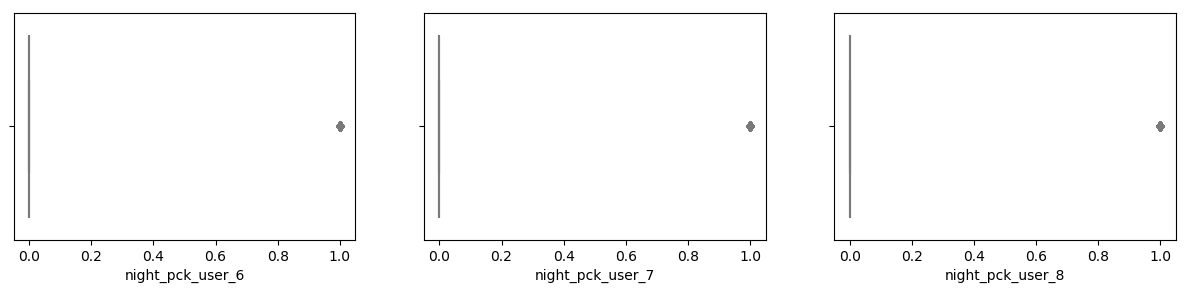

In [37]:
#Plot distribution for total_count_data_rech_8
f, (x1,x2,x3) = plt.subplots(1, 3, figsize=(15, 3),  dpi=100)
sns.boxplot(x="night_pck_user_6", data=telecom, ax=x1, palette="pastel");

sns.boxplot(x="night_pck_user_7", data=telecom, ax=x2, palette="pastel");

sns.boxplot(x="night_pck_user_8", data=telecom, ax=x3, palette="pastel");



In [38]:
#Get relevant percentiles for night_pck_user_6,night_pck_user_7 and night_pck_user_8 to see their distribution
telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8']].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


,night_pck_user_6,night_pck_user_7,night_pck_user_8
0.0,0.0,0.0,0.0
0.1,0.0,0.0,0.0
0.2,0.0,0.0,0.0
0.3,0.0,0.0,0.0
0.4,0.0,0.0,0.0
0.5,0.0,0.0,0.0
0.6,0.0,0.0,0.0
0.7,0.0,0.0,0.0
0.8,0.0,0.0,0.0
0.9,0.0,0.0,0.0


#### Dropping night_pck_user_6, night_pck_user_7 and night_pck_user_8 

>night_pck_user_6, night_pck_user_7 and night_pck_user_8 have mostly 0 values and doesn't add much value

In [39]:
print("Shape of dataframe before:", telecom.shape)

cols_to_be_dropped = ['night_pck_user_6','night_pck_user_7','night_pck_user_8']

telecom.drop(cols_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 44)
Shape of dataframe after: (30001, 41)


#### fb_user_6, fb_user_7 and fb_user_8

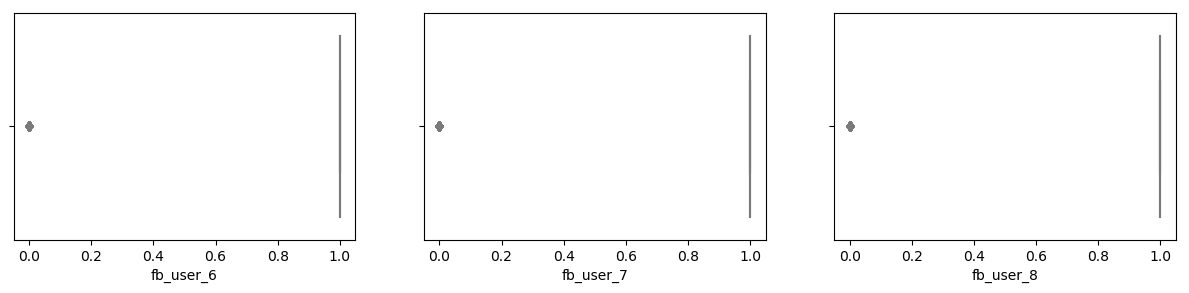

In [40]:
#Plot distribution for total_count_data_rech_8
f, (x1,x2,x3) = plt.subplots(1, 3, figsize=(15, 3),  dpi=100)
sns.boxplot(x="fb_user_6", data=telecom, ax=x1, palette="pastel");

sns.boxplot(x="fb_user_7", data=telecom, ax=x2, palette="pastel");

sns.boxplot(x="fb_user_8", data=telecom, ax=x3, palette="pastel");



In [41]:
#Get relevant percentiles for fb_user_6, fb_user_7 and fb_user_8 to see their distribution
telecom[['fb_user_6','fb_user_7','fb_user_8']].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,fb_user_6,fb_user_7,fb_user_8
0.0,0.0,0.0,0.0
0.1,1.0,1.0,0.0
0.2,1.0,1.0,1.0
0.3,1.0,1.0,1.0
0.4,1.0,1.0,1.0
0.5,1.0,1.0,1.0
0.6,1.0,1.0,1.0
0.7,1.0,1.0,1.0
0.8,1.0,1.0,1.0
0.9,1.0,1.0,1.0


#### Dropping fb_user_6, fb_user_7 and fb_user_8

>fb_user_6, fb_user_7 and fb_user_8 have mostly 1 as a value and hence doesn't add much value 

In [42]:
print("Shape of dataframe before:", telecom.shape)

cols_to_be_dropped = ['fb_user_6','fb_user_7','fb_user_8']

telecom.drop(cols_to_be_dropped, axis=1, inplace=True)
print("Shape of dataframe after:", telecom.shape)

Shape of dataframe before: (30001, 41)
Shape of dataframe after: (30001, 38)


### Recalculating % of missing values in the remaining columns

In [43]:
# Checking % of missing values in each column
missing_col_values = (((telecom.isnull() | telecom.isna()).sum() * 100 / telecom.index.size).round(2))
missing_col_values.sort_values(ascending=False)

av_rech_amt_data_8        46.83
total_rech_data_8         46.83
roam_og_mou_8              3.91
loc_og_t2c_mou_8           3.91
onnet_mou_8                3.91
roam_ic_mou_8              3.91
offnet_mou_8               3.91
avg_roam_og_mou_6_7        2.61
avg_roam_ic_mou_6_7        2.61
avg_offnet_mou_6_7         2.61
avg_onnet_mou_6_7          2.61
avg_loc_og_t2c_mou_6_7     2.61
total_og_mou_8             0.00
total_ic_mou_8             0.00
aon                        0.00
total_rech_amt_8           0.00
max_rech_amt_8             0.00
last_day_rch_amt_6         0.00
last_day_rch_amt_7         0.00
last_day_rch_amt_8         0.00
total_rech_num_8           0.00
avg_rech_data_6_7          0.00
aug_vbc_3g                 0.00
jul_vbc_3g                 0.00
total_sachet_data_8        0.00
churn                      0.00
avg_og_mou_6_7             0.00
avg_ic_mou_6_7             0.00
avg_rech_num_6_7           0.00
avg_rech_amt_6_7           0.00
avg_max_rech_amt_6_7       0.00
avg_rech

In [44]:
telecom.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,avg_loc_og_t2c_mou_6_7,avg_og_mou_6_7,avg_ic_mou_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_rech_num_6_7,avg_rech_amt_6_7,avg_max_rech_amt_6_7,avg_rech_amt_data_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_vol_mb_6_7,total_vol_mb_8,avg_monthly_data_6_7,total_monthly_data_8,avg_sachet_data_6_7,total_sachet_data_8,avg_rech_data_6_7
0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,2,252,252,252,252,252,1.0,252.0,968,30.40,0.00,101.20,1,NaN,0.000,0.000,NaN,NaN,3.5,307.0,252.0,252.0,NaN,NaN,132.890,115.36,1.0,1,0.0,0,1.0
7,52.29,325.91,31.64,38.06,0.00,350.16,428.74,7,3638,1580,0,0,779,NaN,NaN,802,57.74,19.38,18.74,1,0.0,548.385,592.250,56.26,510.295,5.0,1185.0,1185.0,0.0,24.86,18.165,0.000,0.00,0.0,0,0.0,0,0.0
8,35.08,136.48,0.00,0.00,7.15,171.56,16.54,14,120,30,50,0,10,3.0,69.0,315,21.03,910.65,122.16,0,0.0,470.010,66.175,382.36,87.645,20.0,519.0,122.0,88.5,0.00,0.000,553.475,11.97,0.5,0,0.5,3,1.0
21,85.14,983.39,0.00,0.00,0.00,1068.54,261.04,27,718,50,30,20,50,NaN,NaN,720,0.00,0.00,0.00,0,0.0,944.565,169.490,117.26,827.305,24.0,640.0,50.0,0.0,0.00,0.000,0.000,0.00,0.0,0,0.0,0,0.0
23,33.58,205.89,0.00,0.00,17.71,239.48,298.33,4,439,179,0,179,0,2.0,270.0,604,40.45,51.86,0.00,0,0.0,137.210,171.235,49.81,87.385,4.0,227.0,89.5,178.0,0.00,0.000,299.785,1009.93,1.0,1,0.0,1,1.0


### Imputing remaining missing values in all columns with zeroes

In [45]:
# Fill remaining blank spaces with zeroes
telecom.fillna(0,inplace=True)

In [46]:
# Rechecking % of missing values in each column after imputation
missing_col_values = (((telecom.isnull() | telecom.isna()).sum() * 100 / telecom.index.size).round(2))
missing_col_values.sort_values(ascending=False)

avg_rech_data_6_7         0.0
max_rech_amt_8            0.0
aug_vbc_3g                0.0
aon                       0.0
av_rech_amt_data_8        0.0
total_rech_data_8         0.0
last_day_rch_amt_8        0.0
last_day_rch_amt_7        0.0
last_day_rch_amt_6        0.0
total_rech_amt_8          0.0
total_sachet_data_8       0.0
total_rech_num_8          0.0
total_ic_mou_8            0.0
total_og_mou_8            0.0
loc_og_t2c_mou_8          0.0
roam_og_mou_8             0.0
roam_ic_mou_8             0.0
offnet_mou_8              0.0
jul_vbc_3g                0.0
jun_vbc_3g                0.0
churn                     0.0
avg_loc_og_t2c_mou_6_7    0.0
avg_sachet_data_6_7       0.0
total_monthly_data_8      0.0
avg_monthly_data_6_7      0.0
total_vol_mb_8            0.0
avg_vol_mb_6_7            0.0
avg_roam_og_mou_6_7       0.0
avg_roam_ic_mou_6_7       0.0
avg_rech_amt_data_6_7     0.0
avg_max_rech_amt_6_7      0.0
avg_rech_amt_6_7          0.0
avg_rech_num_6_7          0.0
avg_offnet

## EDA 

### Insights:

> It is observed that the tenure of a customer in the network is a good indicator of churn, with tenured customers being less likely to churn as compared to new customers.

> From the plots below we can clearly see that the customers who churned have a marked decrease in the total number of minutes of usage for both incoming and outgoing calls.

> The maximum recharge amounts for churned customers have declined drastically in the action phase.

> The churned customers also have decreased their monthly and sachet data recharges and the number and amount of recharges in general.

> The customers who have churned tend to reduce their interactions with the customer care in the action phase, possibly indicating a loss of faith in their services.

> The mobile internet usage of churned customers show that they were initially consuming a lot of mobile internet in the good phase but have drastically reduced usage in the action phase

> The volume based cost for churned customers also shows a sharp decline.



### Comparing Age on Network for Churned vs Non-Churned customers

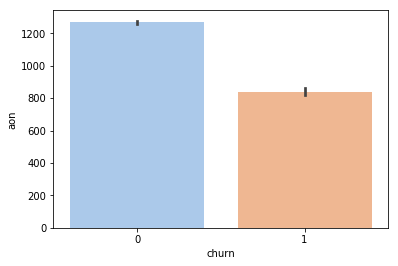

In [47]:
sns.barplot(x="churn", y="aon", data=telecom, palette="pastel");

### Comparing Max Recharge Amounts across months 6, 7 and 8 for Churned vs Non-Churned customers

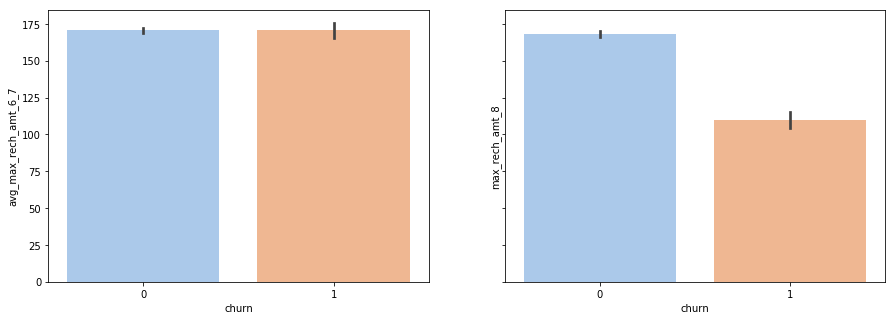

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="avg_max_rech_amt_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="max_rech_amt_8", data=telecom, palette="pastel", ax=ax2);


### Comparing calls to Same or Different Operator Networks across months 6, 7 and 8 for Churned vs Non-Churned customers

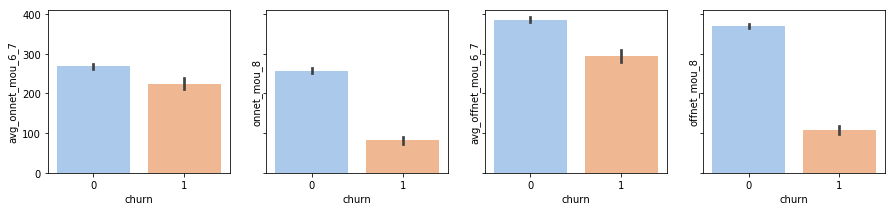

In [49]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
sns.barplot(x="churn", y="avg_onnet_mou_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="onnet_mou_8", data=telecom, palette="pastel", ax=ax2);
sns.barplot(x="churn", y="avg_offnet_mou_6_7", data=telecom, palette="pastel", ax=ax3);
sns.barplot(x="churn", y="offnet_mou_8", data=telecom, palette="pastel", ax=ax4);



### Comparing Sachet and Monthly Data Recharges across months 6, 7 and 8 for Churned vs Non-Churned customers

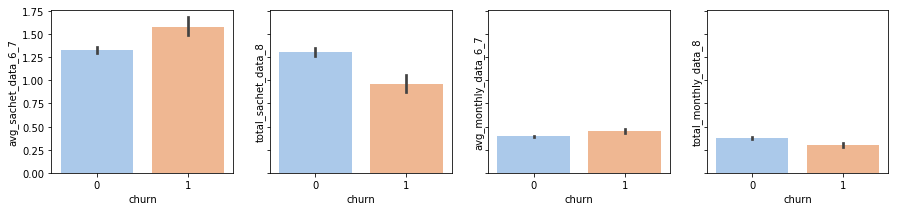

In [50]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
sns.barplot(x="churn", y="avg_sachet_data_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="total_sachet_data_8", data=telecom, palette="pastel", ax=ax2);
sns.barplot(x="churn", y="avg_monthly_data_6_7", data=telecom, palette="pastel", ax=ax3);
sns.barplot(x="churn", y="total_monthly_data_8", data=telecom, palette="pastel", ax=ax4);

### Comparing Incoming and Outgoing Minutes of Usage across months 6, 7 and 8 for Churned vs Non-Churned customers

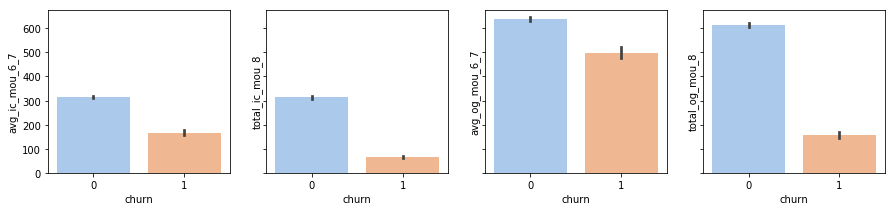

In [51]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
sns.barplot(x="churn", y="avg_ic_mou_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="total_ic_mou_8", data=telecom, palette="pastel", ax=ax2);
sns.barplot(x="churn", y="avg_og_mou_6_7", data=telecom, palette="pastel", ax=ax3);
sns.barplot(x="churn", y="total_og_mou_8", data=telecom, palette="pastel", ax=ax4);


### Comparing Volume Based Cost across months 6,7 and 8 for Churned vs Non-Churned customers

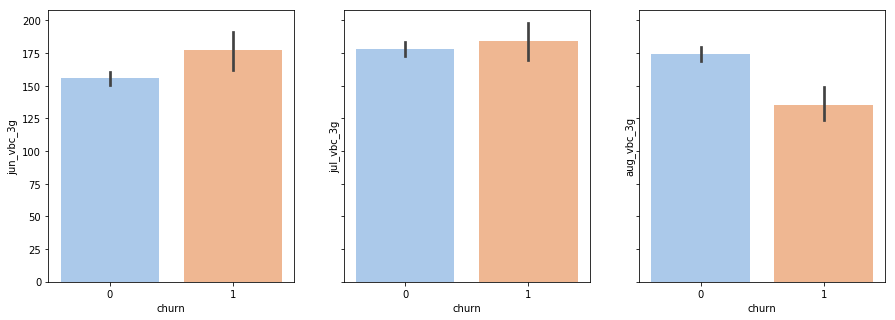

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="jun_vbc_3g", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="jul_vbc_3g", data=telecom, palette="pastel", ax=ax2);
sns.barplot(x="churn", y="aug_vbc_3g", data=telecom, palette="pastel", ax=ax3);

### Comparing Roaming Incoming and Outgoing Minutes of Usage across months 6, 7 and 8 for Churned vs Non-Churned customers

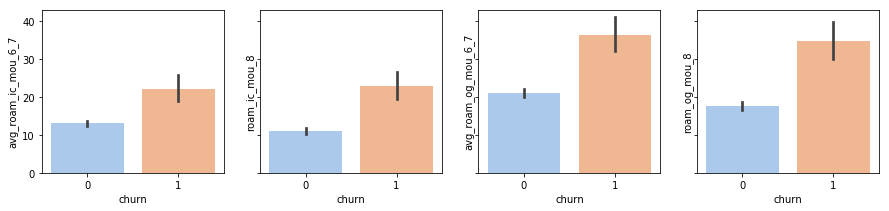

In [53]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
sns.barplot(x="churn", y="avg_roam_ic_mou_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="roam_ic_mou_8", data=telecom, palette="pastel", ax=ax2);
sns.barplot(x="churn", y="avg_roam_og_mou_6_7", data=telecom, palette="pastel", ax=ax3);
sns.barplot(x="churn", y="roam_og_mou_8", data=telecom, palette="pastel", ax=ax4);

### Comparing Total Recharge Amount across months 6, 7 and 8 for Churned vs Non-Churned customers

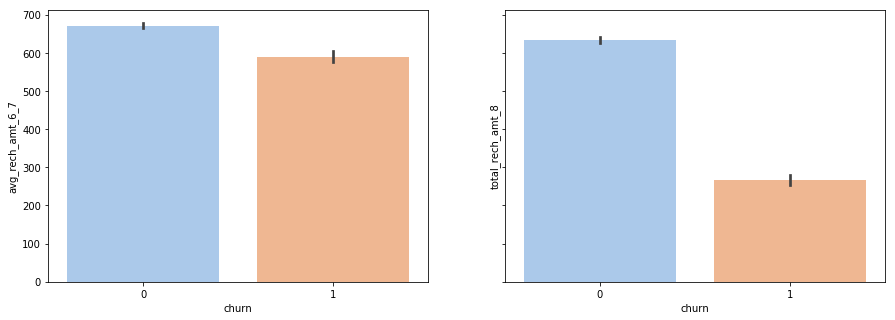

In [54]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="avg_rech_amt_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="total_rech_amt_8", data=telecom, palette="pastel", ax=ax2);


### Comparing Total Number of Recharges across months 6, 7 and 8 for Churned vs Non-Churned customers

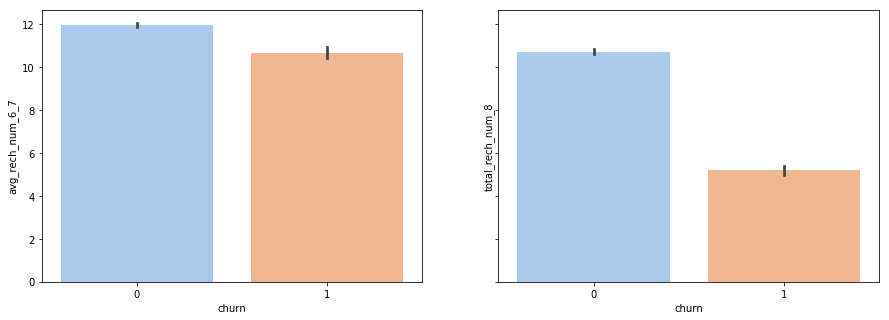

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="avg_rech_num_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="total_rech_num_8", data=telecom, palette="pastel", ax=ax2);


### Comparing Total Minutes of Usage for Calls to Customer Care  across months 6, 7 and 8 for Churned vs Non-Churned customers


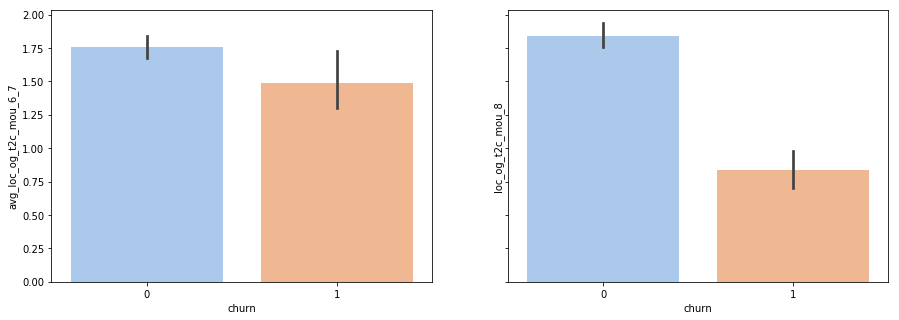

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="avg_loc_og_t2c_mou_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="loc_og_t2c_mou_8", data=telecom, palette="pastel", ax=ax2);

### Comparing Mobile Internet Usage Volume in MB across months 6, 7 and 8 for Churned vs Non-Churned customers

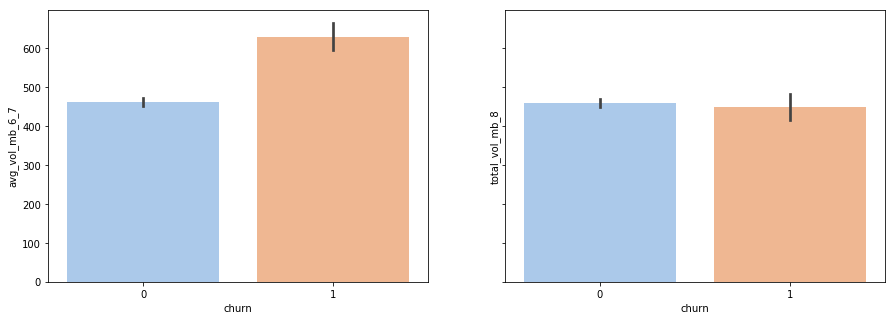

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(x="churn", y="avg_vol_mb_6_7", data=telecom, palette="pastel", ax=ax1);
sns.barplot(x="churn", y="total_vol_mb_8", data=telecom, palette="pastel", ax=ax2);

In [58]:
list(telecom)

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'av_rech_amt_data_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn',
 'avg_loc_og_t2c_mou_6_7',
 'avg_og_mou_6_7',
 'avg_ic_mou_6_7',
 'avg_onnet_mou_6_7',
 'avg_offnet_mou_6_7',
 'avg_rech_num_6_7',
 'avg_rech_amt_6_7',
 'avg_max_rech_amt_6_7',
 'avg_rech_amt_data_6_7',
 'avg_roam_ic_mou_6_7',
 'avg_roam_og_mou_6_7',
 'avg_vol_mb_6_7',
 'total_vol_mb_8',
 'avg_monthly_data_6_7',
 'total_monthly_data_8',
 'avg_sachet_data_6_7',
 'total_sachet_data_8',
 'avg_rech_data_6_7']

## Model Building
Let's start by splitting our data into a training set and a test set.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
telecom.reset_index(drop=True,inplace=True)
X=telecom.drop(['churn'],axis=1)

y=telecom.churn

# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=11)

### Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train).reset_index(drop=True)
X_train.columns=X.columns
X_train.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_loc_og_t2c_mou_6_7,avg_og_mou_6_7,avg_ic_mou_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_rech_num_6_7,avg_rech_amt_6_7,avg_max_rech_amt_6_7,avg_rech_amt_data_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_vol_mb_6_7,total_vol_mb_8,avg_monthly_data_6_7,total_monthly_data_8,avg_sachet_data_6_7,total_sachet_data_8,avg_rech_data_6_7
0,-0.512513,-0.691025,-0.159297,-0.200767,-0.232434,-0.788239,-0.769451,-1.084671,-0.915587,-0.939065,0.073701,-0.708700,-0.651737,-0.546424,-0.622260,-1.063405,-0.395110,1.012440,1.485334,-0.252931,-0.697692,-0.218482,-0.537085,-0.514176,-0.961710,-0.538025,0.187133,0.349987,-0.191121,-0.217582,1.263776,-0.467225,0.90864,-0.510991,-0.498160,-0.425279,-0.282149
1,-0.018397,-0.360419,-0.159297,-0.200767,-0.232434,-0.236591,-0.167064,-0.544693,-0.199936,0.411051,0.202636,-0.708700,-0.651737,-0.210320,0.387694,0.530613,3.219108,2.252446,0.641570,-0.252931,-0.349332,-0.215558,-0.051055,-0.444855,0.416031,-0.097181,0.187133,0.349987,-0.019174,-0.046463,0.680360,1.305765,0.90864,0.892280,-0.498160,-0.425279,-0.282149
2,-0.182241,0.143991,-0.159297,-0.200767,-0.232434,0.004404,0.063906,-0.436698,0.303207,-0.172623,0.145331,0.002066,0.276484,-0.546424,-0.622260,0.086379,-0.395110,-0.399063,-0.378152,-0.252931,0.007806,0.082417,-0.201243,0.170147,-0.272839,0.280948,-0.325881,-0.738423,-0.206759,-0.253015,-0.529896,-0.467225,-0.60396,-0.510991,-0.498160,-0.425279,-0.650159
3,-0.466411,-0.657136,-0.159297,-0.200767,-0.194733,-0.732552,-0.466060,-0.652689,-0.695267,-0.402556,-0.162679,-0.061903,-0.001983,-0.210320,-0.158089,-0.904525,-0.395110,-0.399063,-0.378152,-0.252931,-0.897294,-0.586149,-0.572235,-0.760179,-0.445057,-0.691121,-0.516617,0.124609,-0.206759,-0.253015,-0.130376,-0.307009,-0.60396,-0.510991,0.594772,-0.088189,0.453869
4,-0.505022,-0.447960,-0.159297,-0.200767,-0.232434,-0.615537,-0.402294,-0.760684,-0.342129,-0.042918,-0.212820,-0.211164,-0.151926,0.461886,1.667990,-1.050861,1.902277,2.251485,1.321812,-0.247221,-0.674095,-0.542215,-0.549302,-0.464658,-0.732086,-0.312992,-0.115414,1.768219,-0.206759,-0.253015,0.620648,0.644195,-0.60396,0.892280,0.594772,0.248901,0.453869


In [63]:
y_train=y_train.reset_index(drop=True)
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [64]:
X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test).reset_index(drop=True)
X_test.columns=X.columns
y_test=y_test.reset_index(drop=True)
y_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [65]:
X_LM_Train=X_train
y_LM_Train=y_train
X_LM_Test=X_test
y_LM_Test=y_test

## Dimensionality reduction

### Recursive Feature Elimination

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with  variables as output
rfe = rfe.fit(X_train,y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 16),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 9),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 10),
 ('last_day_rch_amt_6', False, 6),
 ('last_day_rch_amt_7', False, 20),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', False, 15),
 ('av_rech_amt_data_8', False, 8),
 ('aon', True, 1),
 ('aug_vbc_3g', False, 5),
 ('jul_vbc_3g', False, 21),
 ('jun_vbc_3g', False, 23),
 ('avg_loc_og_t2c_mou_6_7', False, 12),
 ('avg_og_mou_6_7', True, 1),
 ('avg_ic_mou_6_7', True, 1),
 ('avg_onnet_mou_6_7', True, 1),
 ('avg_offnet_mou_6_7', True, 1),
 ('avg_rech_num_6_7', False, 2),
 ('avg_rech_amt_6_7', False, 18),
 ('avg_max_rech_amt_6_7', True, 1),
 ('avg_rech_amt_data_6_7', False, 3),
 ('avg_roam_ic_mou_6_7', False, 11),
 ('avg_roam_og_mou_6_7', True, 1),
 ('avg_vol_mb_6_7', False, 13),
 ('tota

In [68]:
#Variables selected by RFE
variablelist = X_train.columns[rfe.support_]
variablelist

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'aon', 'avg_og_mou_6_7', 'avg_ic_mou_6_7',
       'avg_onnet_mou_6_7', 'avg_offnet_mou_6_7', 'avg_max_rech_amt_6_7',
       'avg_roam_og_mou_6_7'],
      dtype='object')

In [69]:
# Using only the subset of features selected by RFE
X_train = X_train[variablelist]
X_test = X_test[variablelist]

### PCA on the train data

We'll calculate the PCs using the train data, and apply them later on the test data

In [70]:
X_train.shape

(21000, 15)

In [71]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=11)

In [72]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=11,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [73]:
pca.components_

array([[ 3.19453471e-01,  3.55087280e-01,  9.06376449e-02,
         4.42843711e-01,  1.56392173e-01,  2.10674564e-01,
         3.15626953e-01,  1.00475190e-01,  7.67104260e-03,
         4.11721986e-01,  1.33387314e-01,  2.85750783e-01,
         3.25474455e-01,  7.59337891e-02,  9.08832308e-02],
       [-2.66453562e-01,  1.12923758e-01,  2.01110925e-02,
        -9.92898284e-02,  4.11095928e-01, -2.09182581e-01,
         1.91633024e-01,  3.61596029e-01,  2.79724201e-01,
        -1.47565369e-01,  4.10184810e-01, -2.98658359e-01,
         8.49269288e-02,  4.01096212e-01,  1.39773256e-02],
       [-5.71934963e-02,  6.92404084e-02,  5.17584765e-01,
        -6.09399516e-02, -3.82086406e-01, -1.46166905e-01,
         1.42211085e-01,  2.31700080e-01, -1.78838790e-02,
        -5.84563574e-02, -3.82593746e-01, -5.72573708e-02,
         6.96104861e-02,  2.47124982e-01,  5.09660240e-01],
       [-4.27839852e-01,  4.10454522e-01,  6.63025931e-02,
        -5.54958216e-03, -8.45643411e-03,  2.44583384

In [74]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.319453,-0.266454,onnet_mou_8
1,0.355087,0.112924,offnet_mou_8
2,0.090638,0.020111,roam_og_mou_8
3,0.442844,-0.099290,total_og_mou_8
4,0.156392,0.411096,total_ic_mou_8
5,0.210675,-0.209183,total_rech_num_8
6,0.315627,0.191633,total_rech_amt_8
7,0.100475,0.361596,last_day_rch_amt_8
8,0.007671,0.279724,aon
9,0.411722,-0.147565,avg_og_mou_6_7


#### Looking at the screeplot to assess the number of needed principal components

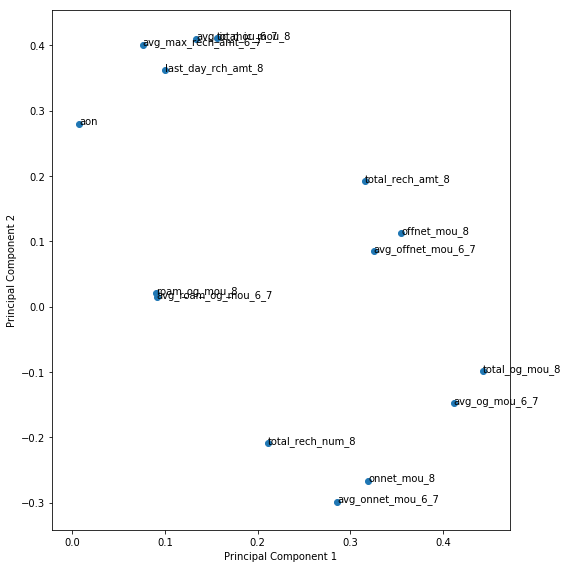

In [75]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [76]:
pca.explained_variance_ratio_

array([2.84105479e-01, 1.43631640e-01, 1.11412745e-01, 1.00054381e-01,
       8.76362624e-02, 6.81596351e-02, 5.85061678e-02, 3.51140113e-02,
       3.39983811e-02, 2.76061585e-02, 2.30856809e-02, 1.50279214e-02,
       1.12976941e-02, 3.55347024e-04, 8.49544194e-06])

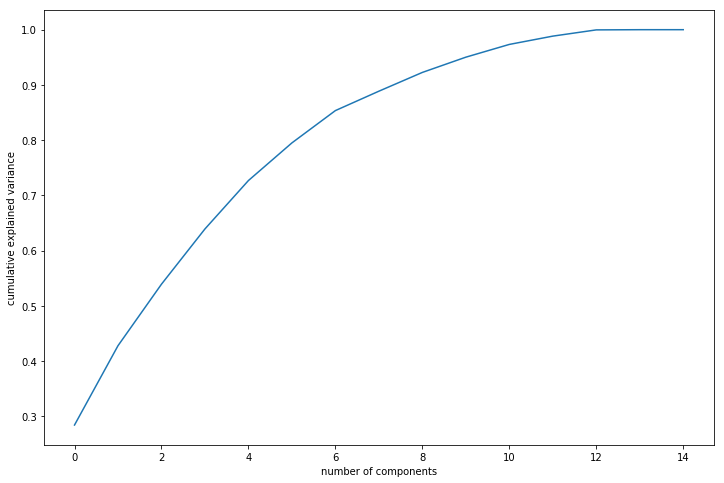

In [77]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 10 components are enough to describe 95% of the variance in the dataset
- We'll choose 10 components for our modeling

In [78]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

#### Basis transformation - getting the data onto our PCs

In [79]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 10)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [80]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

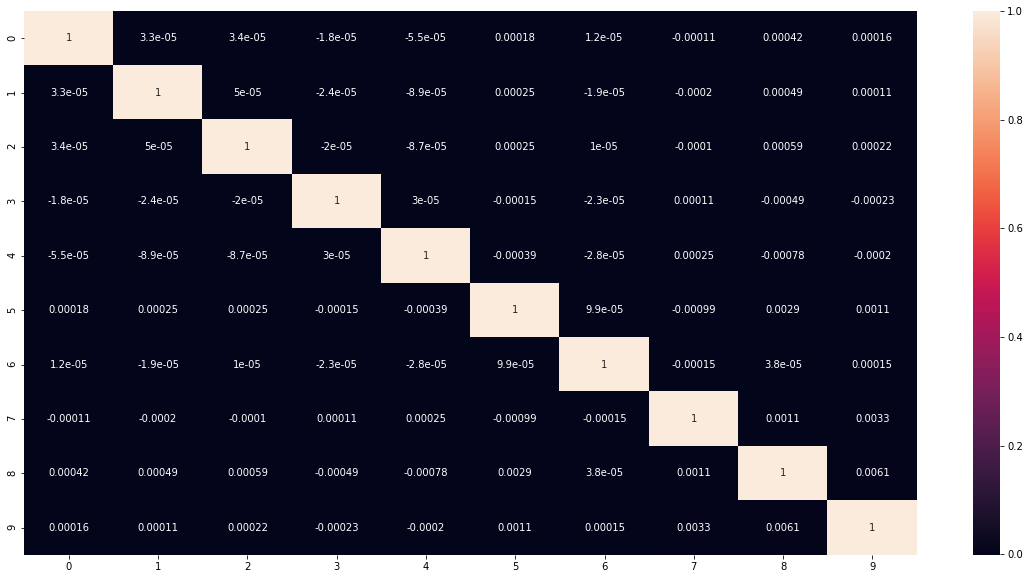

In [81]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10));
sns.heatmap(corrmat,annot = True);

In [82]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.006112329518386576 , min corr:  -0.0009888199503914816


In [83]:
#Applying selected components to the test data - 10 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 10)

###  Handling Class Imbalance using SMOTE (Synthetic Minority Oversampling TEchnique)

#### Churn rate

In [84]:
print(telecom.churn.value_counts()/telecom.churn.count())

0    0.865604
1    0.134396
Name: churn, dtype: float64


> This is an imbalanced dataset as only 13% of our dataset contains cases of churn

In [85]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
df_train_pca, y_train_pca = sm.fit_resample(df_train_pca, y_train.ravel())

#X_train = pd.DataFrame(data=X_train_res, columns=cols)
#y_train = pd.DataFrame(data=y_train_res, columns=['churn'])

print('After OverSampling, the shape of train_X: {}'.format(df_train_pca.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, counts of label '1': 2785
Before OverSampling, counts of label '0': 18215 

After OverSampling, the shape of train_X: (36430, 10)
After OverSampling, the shape of train_y: (21000,) 



### Applying Logistic Regression on our Principal Components

In [86]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_pca)

In [87]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train_pca, pred_probs_train))

'0.86'

In [88]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [89]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model_pca.predict(df_test_pca)
print(confusion_matrix(y_test,pred))

[[5872 1882]
 [ 227 1020]]


In [90]:
y_train_pca

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
y_train_pca_final = pd.DataFrame({'Churn':y_train_pca, 'Churn_Prob':pred_probs_train})
y_train_pca_final.head()

,Churn,Churn_Prob
0,1,0.855810
1,0,0.372873
2,0,0.211986
3,0,0.699289
4,0,0.684253


#### Finding Optimal threshold value

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pca_final[i]= y_train_pca_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pca_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.855810,1,1,1,1,1,1,1,1,1,0
1,0,0.372873,1,1,1,1,0,0,0,0,0,0
2,0,0.211986,1,1,1,0,0,0,0,0,0,0
3,0,0.699289,1,1,1,1,1,1,1,0,0,0
4,0,0.684253,1,1,1,1,1,1,1,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pca_final.Churn, y_train_pca_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.619599  0.971342  0.267856
0.2   0.2  0.686879  0.948614  0.425144
0.3   0.3  0.734422  0.917431  0.551414
0.4   0.4  0.770656  0.882844  0.658468
0.5   0.5  0.791875  0.833050  0.750700
0.6   0.6  0.792918  0.752841  0.832995
0.7   0.7  0.766182  0.625364  0.907000
0.8   0.8  0.665358  0.366621  0.964096
0.9   0.9  0.543288  0.096130  0.990447


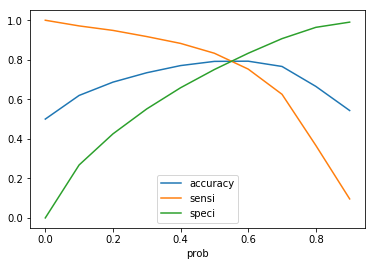

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pca_final['predicted'] = y_train_pca_final.Churn_Prob.map(lambda x: 1 if x > 0.55  else 0)

In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pca_final.Churn, y_train_pca_final.predicted )
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[14458  3757]
 [ 3703 14512]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pca_final.Churn, y_train_pca_final.predicted))

0.7952237167169914


In [98]:
Sensitivity=round(TP/(FN+TP),2)
Specificity=round(TN/(TN+FP),2)
Precision=round(TP/(TP+FP),2)
Recall=Sensitivity

print("Sensitivity :",Sensitivity)
print("Specificity :",Specificity)
print("Precision :",Precision)
print("Recall :",Recall)

Sensitivity : 0.8
Specificity : 0.79
Precision : 0.79
Recall : 0.8


### Applying Random Forest Classifier on our Principal Components

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [99]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc_pca2 = RandomForestClassifier()

In [100]:
#training the random forest classifier
model_pca2 = rfc_pca2.fit(df_train_pca,y_train_pca_final.Churn)

In [101]:
# Making predictions on the test data
predictions_test = model_pca2.predict(df_test_pca)

In [102]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [103]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7754
           1       0.52      0.63      0.57      1247

   micro avg       0.87      0.87      0.87      9001
   macro avg       0.73      0.77      0.75      9001
weighted avg       0.88      0.87      0.87      9001



In [104]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_test))

[[7043  711]
 [ 466  781]]


In [105]:
"{:2.2f}".format(accuracy_score(y_test, predictions_test))

'0.87'

#### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [106]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [107]:
# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train_pca_final.Churn)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [108]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8313203403788086 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [109]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=5,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100)

In [110]:
# fit
rfc.fit(df_train_pca,y_train_pca_final.Churn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
# predict
predictions = rfc.predict(df_test_pca)

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7754
           1       0.46      0.81      0.59      1247

   micro avg       0.84      0.84      0.84      9001
   macro avg       0.71      0.83      0.75      9001
weighted avg       0.89      0.84      0.86      9001



In [113]:
print(confusion_matrix(y_test,predictions))


[[6586 1168]
 [ 243 1004]]


In [114]:
"{:2.2f}".format(accuracy_score(y_test, predictions))

'0.84'

#### Let's visualize the data to see if we can spot any patterns

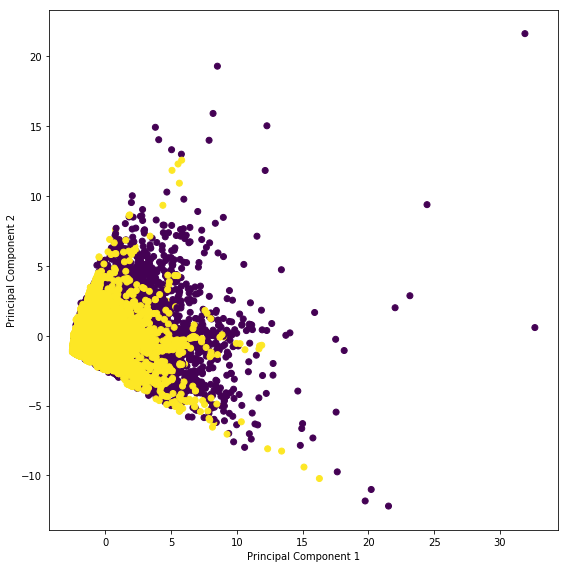

In [115]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train_pca_final.Churn)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Model Evaluation  Metrics

> In this case study, 'Recall' shall be the model metric we use to select our best model as there is a high cost associated with False Negative. This is because if a churner (Actual Positive) is predicted as non-churner (Predicted Negative), the consequence can be very bad for the telecom operator.

- Our Logistic Regression Model has a recall of around 0.80, i.e, _it can predict 80% of the churners accurately._
- Our Random Forest Classifier with tuned hyperparameters with a recall of 0.81 _can predict churners 81% of the time._




## Variable prediction

### Logistic Regresssion without using PCA (to identify important variables that are strong predictors of churn)

####  Feature Selection Using RFE

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100,class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with  variables as output
rfe = rfe.fit(X_train,y_train)


In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('aon', True, 1),
 ('avg_og_mou_6_7', True, 1),
 ('avg_ic_mou_6_7', True, 1),
 ('avg_onnet_mou_6_7', True, 1),
 ('avg_offnet_mou_6_7', True, 1),
 ('avg_max_rech_amt_6_7', True, 1),
 ('avg_roam_og_mou_6_7', True, 1)]

In [118]:
#Variables selected by RFE
variablelist = X_train.columns[rfe.support_]
variablelist

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'aon', 'avg_og_mou_6_7', 'avg_ic_mou_6_7',
       'avg_onnet_mou_6_7', 'avg_offnet_mou_6_7', 'avg_max_rech_amt_6_7',
       'avg_roam_og_mou_6_7'],
      dtype='object')

In [119]:
#### Building Logistic Regression 

import statsmodels.api as sm
x_train_sm = sm.add_constant(X_train[variablelist])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial(),random_state=100,class_weight='balanced').fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5887.3
Date:                Mon, 20 May 2019   Deviance:                       11775.
Time:                        20:31:32   Pearson chi2:                 1.74e+06
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2440      0.051    -63.528      0.000      -3.344      -3.144
onnet_mou_8             -0.8409      1.573     -0.535      0.593      -3.924       2.242
offnet_mou_8            -1.1878      1.662     -0.715      0.475      -4.445       2.069
roam_og_mou_8            0.2901      0.332      0.875      0.382      -0.360       0.940
total_og_mou_8           0.5938      2.406      0.247      0.805      -4.121       5.309
total_ic_mou_8          -2.3089      0.105    -22.001      0.000      -2.515      -2.103
total_rech_num_8        -0.6712      0.055    -12.238      0.000      -0.779      -0.564
total_rech_amt_8        -0.2530      0.076     -3.325      0.001      -0.402      -0.104
last_day_rch_amt_8      -0.1832      0.039     -4.756      0.000      -0.259      -0.108
aon                     -0.3806      0.030    -12.619      0.000      -0.440      -0.321
avg_og_mou_6_7           1.8436      0.219      8.409      0.000       1.414       2.273
avg_ic_mou_6_7           0.3502      0.049      7.170      0.000       0.254       0.446
avg_onnet_mou_6_7       -1.1109      0.145     -7.681      0.000      -1.394      -0.827
avg_offnet_mou_6_7      -1.0517      0.156     -6.730      0.000      -1.358      -0.745
avg_max_rech_amt_6_7     0.1860      0.027      6.817      0.000       0.133       0.239
avg_roam_og_mou_6_7      0.3168      0.039      8.046      0.000       0.240       0.394
========================================================================================
"""

In [120]:
#### Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[variablelist].columns
vif['VIF'] = [variance_inflation_factor(X_train[variablelist].values, i) for i in range(X_train[variablelist].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
#pd.options.display.float_format = '{:.0f}'.format
vif

,Features,VIF
3,total_og_mou_8,4083.28
1,offnet_mou_8,1941.86
0,onnet_mou_8,1746.94
9,avg_og_mou_6_7,97.64
2,roam_og_mou_8,78.60
12,avg_offnet_mou_6_7,49.12
11,avg_onnet_mou_6_7,44.76
14,avg_roam_og_mou_6_7,3.21
4,total_ic_mou_8,3.18
10,avg_ic_mou_6_7,3.09


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 

The variable 'total_og_mou_8' has the highest VIF. So let's start by dropping that.

In [121]:
variablelist = variablelist.drop('total_og_mou_8', 1)
variablelist

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'avg_og_mou_6_7', 'avg_ic_mou_6_7', 'avg_onnet_mou_6_7',
       'avg_offnet_mou_6_7', 'avg_max_rech_amt_6_7', 'avg_roam_og_mou_6_7'],
      dtype='object')

In [122]:
# Let's re-run the model using the selected variables
x_train_sm=sm.add_constant(X_train[variablelist])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial(),random_state=100,class_weight='balanced').fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5887.3
Date:                Mon, 20 May 2019   Deviance:                       11775.
Time:                        20:31:32   Pearson chi2:                 1.73e+06
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2438      0.051    -63.543      0.000      -3.344      -3.144
onnet_mou_8             -0.4528      0.063     -7.212      0.000      -0.576      -0.330
offnet_mou_8            -0.7780      0.076    -10.301      0.000      -0.926      -0.630
roam_og_mou_8            0.2085      0.028      7.476      0.000       0.154       0.263
total_ic_mou_8          -2.3082      0.105    -22.003      0.000      -2.514      -2.103
total_rech_num_8        -0.6702      0.055    -12.253      0.000      -0.777      -0.563
total_rech_amt_8        -0.2517      0.076     -3.313      0.001      -0.401      -0.103
last_day_rch_amt_8      -0.1834      0.039     -4.762      0.000      -0.259      -0.108
aon                     -0.3808      0.030    -12.633      0.000      -0.440      -0.322
avg_og_mou_6_7           1.8495      0.218      8.486      0.000       1.422       2.277
avg_ic_mou_6_7           0.3501      0.049      7.167      0.000       0.254       0.446
avg_onnet_mou_6_7       -1.1146      0.144     -7.748      0.000      -1.396      -0.833
avg_offnet_mou_6_7      -1.0555      0.155     -6.788      0.000      -1.360      -0.751
avg_max_rech_amt_6_7     0.1863      0.027      6.834      0.000       0.133       0.240
avg_roam_og_mou_6_7      0.3176      0.039      8.093      0.000       0.241       0.395
========================================================================================
"""

In [123]:
##### Let's check the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[variablelist].columns
vif['VIF'] = [variance_inflation_factor(X_train[variablelist].values, i) for i in range(X_train[variablelist].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
#pd.options.display.float_format = '{:.0f}'.format
vif

,Features,VIF
8,avg_og_mou_6_7,96.49
11,avg_offnet_mou_6_7,48.61
10,avg_onnet_mou_6_7,44.32
13,avg_roam_og_mou_6_7,3.19
3,total_ic_mou_8,3.18
9,avg_ic_mou_6_7,3.09
0,onnet_mou_8,2.73
1,offnet_mou_8,2.62
5,total_rech_amt_8,1.99
4,total_rech_num_8,1.55


Drop 'avg_og_mou_6_7' since it has high VIF

In [124]:
variablelist = variablelist.drop('avg_og_mou_6_7', 1)
variablelist

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'avg_ic_mou_6_7', 'avg_onnet_mou_6_7', 'avg_offnet_mou_6_7',
       'avg_max_rech_amt_6_7', 'avg_roam_og_mou_6_7'],
      dtype='object')

In [125]:
# Let's re-run the model using the selected variables
x_train_sm=sm.add_constant(X_train[variablelist])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial(),random_state=100,class_weight='balanced').fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5918.4
Date:                Mon, 20 May 2019   Deviance:                       11837.
Time:                        20:31:32   Pearson chi2:                 1.96e+06
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2523      0.051    -63.437      0.000      -3.353      -3.152
onnet_mou_8             -0.3992      0.064     -6.236      0.000      -0.525      -0.274
offnet_mou_8            -0.7485      0.076     -9.905      0.000      -0.897      -0.600
roam_og_mou_8            0.2071      0.028      7.439      0.000       0.153       0.262
total_ic_mou_8          -2.3675      0.106    -22.414      0.000      -2.575      -2.160
total_rech_num_8        -0.6809      0.055    -12.437      0.000      -0.788      -0.574
total_rech_amt_8        -0.2598      0.077     -3.390      0.001      -0.410      -0.110
last_day_rch_amt_8      -0.1916      0.039     -4.935      0.000      -0.268      -0.115
aon                     -0.3838      0.030    -12.763      0.000      -0.443      -0.325
avg_ic_mou_6_7           0.3762      0.049      7.618      0.000       0.279       0.473
avg_onnet_mou_6_7        0.1147      0.035      3.288      0.001       0.046       0.183
avg_offnet_mou_6_7       0.2279      0.035      6.502      0.000       0.159       0.297
avg_max_rech_amt_6_7     0.1838      0.027      6.774      0.000       0.131       0.237
avg_roam_og_mou_6_7      0.0703      0.026      2.684      0.007       0.019       0.122
========================================================================================
"""

In [126]:
##### Let's check the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[variablelist].columns
vif['VIF'] = [variance_inflation_factor(X_train[variablelist].values, i) for i in range(X_train[variablelist].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
#pd.options.display.float_format = '{:.0f}'.format
vif

,Features,VIF
3,total_ic_mou_8,3.17
8,avg_ic_mou_6_7,3.08
0,onnet_mou_8,2.68
1,offnet_mou_8,2.61
9,avg_onnet_mou_6_7,2.44
10,avg_offnet_mou_6_7,2.20
5,total_rech_amt_8,1.99
4,total_rech_num_8,1.54
11,avg_max_rech_amt_6_7,1.50
2,roam_og_mou_8,1.45


All variables have a p-value less than 0.05 and VIF less than 5

In [127]:
#Making predictions
y_train_pred = logm3.predict(x_train_sm).values.reshape(-1)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [128]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.626466,0
1,0,0.080587,1
2,0,0.032968,2
3,0,0.247496,3
4,0,0.235557,4


### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.626466,0,1,1,1,1,1,1,1,0,0,0
1,0,0.080587,1,1,0,0,0,0,0,0,0,0,0
2,0,0.032968,2,1,0,0,0,0,0,0,0,0,0
3,0,0.247496,3,1,1,1,0,0,0,0,0,0,0
4,0,0.235557,4,1,1,1,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.132619  1.000000  0.000000
0.1   0.1  0.708000  0.870018  0.683228
0.2   0.2  0.827333  0.774147  0.835465
0.3   0.3  0.877286  0.647038  0.912490
0.4   0.4  0.894143  0.479713  0.957508
0.5   0.5  0.886810  0.261041  0.982487
0.6   0.6  0.876905  0.112388  0.993796
0.7   0.7  0.871667  0.041293  0.998628
0.8   0.8  0.869095  0.015440  0.999616
0.9   0.9  0.868095  0.005386  1.000000


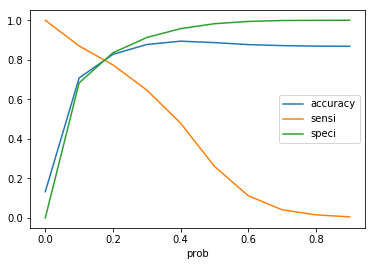

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.15 is the optimum point to take it as a cutoff probability.

In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.15 else 0)

In [133]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[14111  4104]
 [  498  2287]]


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7808571428571428


In [135]:
Sensitivity=round(TP/(FN+TP),2)
Specificity=round(TN/(TN+FP),2)
Precision=round(TP/(TP+FP),2)
Recall=Sensitivity

print("Sensitivity :",Sensitivity)
print("Specificity :",Specificity)
print("Precision :",Precision)
print("Recall :",Recall)

Sensitivity : 0.82
Specificity : 0.77
Precision : 0.36
Recall : 0.82


### Plotting the ROC Curve

In [136]:
def draw_roc(model,actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(model +' Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

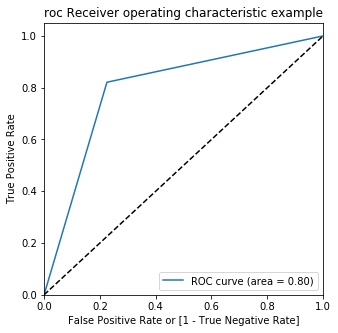

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.predicted, drop_intermediate = False )
draw_roc("roc",y_train_pred_final.Churn, y_train_pred_final.predicted)

#### Making Prediction on test data

In [138]:
variablelist

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'avg_ic_mou_6_7', 'avg_onnet_mou_6_7', 'avg_offnet_mou_6_7',
       'avg_max_rech_amt_6_7', 'avg_roam_og_mou_6_7'],
      dtype='object')

In [139]:
X_test=X_test[variablelist]
y_test_prob=logm3.predict(sm.add_constant(X_test))

In [140]:
y_test_pred_final = pd.DataFrame({'Churn':y_test,'Churn_Prob':y_test_prob})
y_test_pred_final.head(5)

,Churn,Churn_Prob
0,0,0.068528
1,0,0.138337
2,0,0.009625
3,0,0.020243
4,0,0.096932


In [141]:
y_test_pred_final['predicted_Churn'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.15 else 0)

y_test_pred_final.head()

,Churn,Churn_Prob,predicted_Churn
0,0,0.068528,0
1,0,0.138337,0
2,0,0.009625,0
3,0,0.020243,0
4,0,0.096932,0


Overall Accuracy, Sensitivity and Specificity

In [142]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted_Churn)

0.7862459726697034

In [143]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted_Churn)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
Sensitivity=round(TP/(FN+TP),2)
Specificity=round(TN/(TN+FP),2)
Precision=round(TP/(TP+FP),2)
Recall=Sensitivity


print("Sensitivity :",Sensitivity)
print("Specificity :",Specificity)
print("Precision :",Precision)
print("Recall :",Recall)

[[6040 1714]
 [ 210 1037]]
Sensitivity : 0.83
Specificity : 0.78
Precision : 0.38
Recall : 0.83


### Evaluation metrics of the model

#### Interpreting the model and identifying the important variables

In [144]:
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5918.4
Date:                Mon, 20 May 2019   Deviance:                       11837.
Time:                        20:31:33   Pearson chi2:                 1.96e+06
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2523      0.051    -63.437      0.000      -3.353      -3.152
onnet_mou_8             -0.3992      0.064     -6.236      0.000      -0.525      -0.274
offnet_mou_8            -0.7485      0.076     -9.905      0.000      -0.897      -0.600
roam_og_mou_8            0.2071      0.028      7.439      0.000       0.153       0.262
total_ic_mou_8          -2.3675      0.106    -22.414      0.000      -2.575      -2.160
total_rech_num_8        -0.6809      0.055    -12.437      0.000      -0.788      -0.574
total_rech_amt_8        -0.2598      0.077     -3.390      0.001      -0.410      -0.110
last_day_rch_amt_8      -0.1916      0.039     -4.935      0.000      -0.268      -0.115
aon                     -0.3838      0.030    -12.763      0.000      -0.443      -0.325
avg_ic_mou_6_7           0.3762      0.049      7.618      0.000       0.279       0.473
avg_onnet_mou_6_7        0.1147      0.035      3.288      0.001       0.046       0.183
avg_offnet_mou_6_7       0.2279      0.035      6.502      0.000       0.159       0.297
avg_max_rech_amt_6_7     0.1838      0.027      6.774      0.000       0.131       0.237
avg_roam_og_mou_6_7      0.0703      0.026      2.684      0.007       0.019       0.122
========================================================================================
"""

The estimated coefficients are the log odds. Formula for the model as below:
    ln(p/1-p):B0+B1*x1+B2*x2+B3*x3.....
        
logit(p) = log(P/(1-P)) = -3.2523-0.3992*onnet_mou_8-0.7485*offnet_mou_8+0.2071*roam_og_mou_8-2.3675*total_ic_mou_8 
-0.6809*total_rech_num_8-0.2598*total_rech_amt_8-0.1916*last_day_rch_amt_8-0.3838*aon+0.3762*avg_ic_mou_6_7
+0.1147*avg_onnet_mou_6_7+0.2279*avg_offnet_mou_6_7+0.1838*avg_max_rech_amt_6_7+0.0703*avg_roam_og_mou_6_7

1.Variable's *** roam_og_mou_8,avg_ic_mou_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_max_rech_amt_6_7,avg_roam_og_mou_6_7  *** have positive influence on customer churn.  Higher the value the more the probability of churn.

2.Variable's ***onnet_mou_8, aon, last_day_rch_amt_8, total_rech_amt_8, total_rech_num_8, total_ic_mou_8, offnet_mou_8 *** have a negative impact on customer churn.  Lesser the value more the probability to churn


Estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret.

In [145]:
np.exp(logm3.params).sort_values(ascending=False)

avg_ic_mou_6_7          1.456736
avg_offnet_mou_6_7      1.255927
roam_og_mou_8           1.230058
avg_max_rech_amt_6_7    1.201761
avg_onnet_mou_6_7       1.121509
avg_roam_og_mou_6_7     1.072810
last_day_rch_amt_8      0.825665
total_rech_amt_8        0.771242
aon                     0.681282
onnet_mou_8             0.670887
total_rech_num_8        0.506149
offnet_mou_8            0.473097
total_ic_mou_8          0.093716
const                   0.038685
dtype: float64

The important predictors are:

1. Age on network 'aon'
2. Average incoming call minute of usage during good phase & acion phase 'avg_ic_mou_6_7'and 'total_ic_mou_8' 
3. All kind of calls outside the operator T network  "avg_onnet_mou_6_7" and "onnet_mou_8" during good and action phase &
   within the same operator network during good phase and actio phase "avg_offnet_mou_6_7" and "offnet_mou_8"
4. Roaming outgoing calls minute of usage during action phase and good phase'roam_og_mou_8' & "avg_roam_og_mou_6_7"
5. Average maximum recharge amount during good phase 'avg_max_rech_amt_6_7'
6. Last day recharge amount during action phase "last_day_rch_amt_8"
7. Total recharge amount during action phase wrt "total_rech_amt_8"
8. Total recharge number during action phase "total_rech_num_8"


Let us put the important predictors, Actual churn and Predicted churn together in a dataframe to visualize it.

In [146]:
#col=[col for col in x_train_sm.columns if col.find('const')==-1]
train=X_LM_Train[variablelist]
x_train=pd.concat([y_train_pred_final.loc[:,['Churn','predicted']],train],axis=1)
x_train.head()


,Churn,predicted,onnet_mou_8,offnet_mou_8,roam_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,aon,avg_ic_mou_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_max_rech_amt_6_7,avg_roam_og_mou_6_7
0,1,1,-0.512513,-0.691025,-0.200767,-0.769451,-1.084671,-0.915587,-0.651737,-1.063405,-0.218482,-0.537085,-0.514176,0.187133,-0.217582
1,0,0,-0.018397,-0.360419,-0.200767,-0.167064,-0.544693,-0.199936,-0.651737,0.530613,-0.215558,-0.051055,-0.444855,0.187133,-0.046463
2,0,0,-0.182241,0.143991,-0.200767,0.063906,-0.436698,0.303207,0.276484,0.086379,0.082417,-0.201243,0.170147,-0.325881,-0.253015
3,0,1,-0.466411,-0.657136,-0.200767,-0.466060,-0.652689,-0.695267,-0.001983,-0.904525,-0.586149,-0.572235,-0.760179,-0.516617,-0.253015
4,0,1,-0.505022,-0.447960,-0.200767,-0.402294,-0.760684,-0.342129,-0.151926,-1.050861,-0.542215,-0.549302,-0.464658,-0.115414,-0.253015


**Data visualization of important predictors againt Actual churn and the Predicted churn**.


Here 0 stand for not churn and 1 stands for churn.

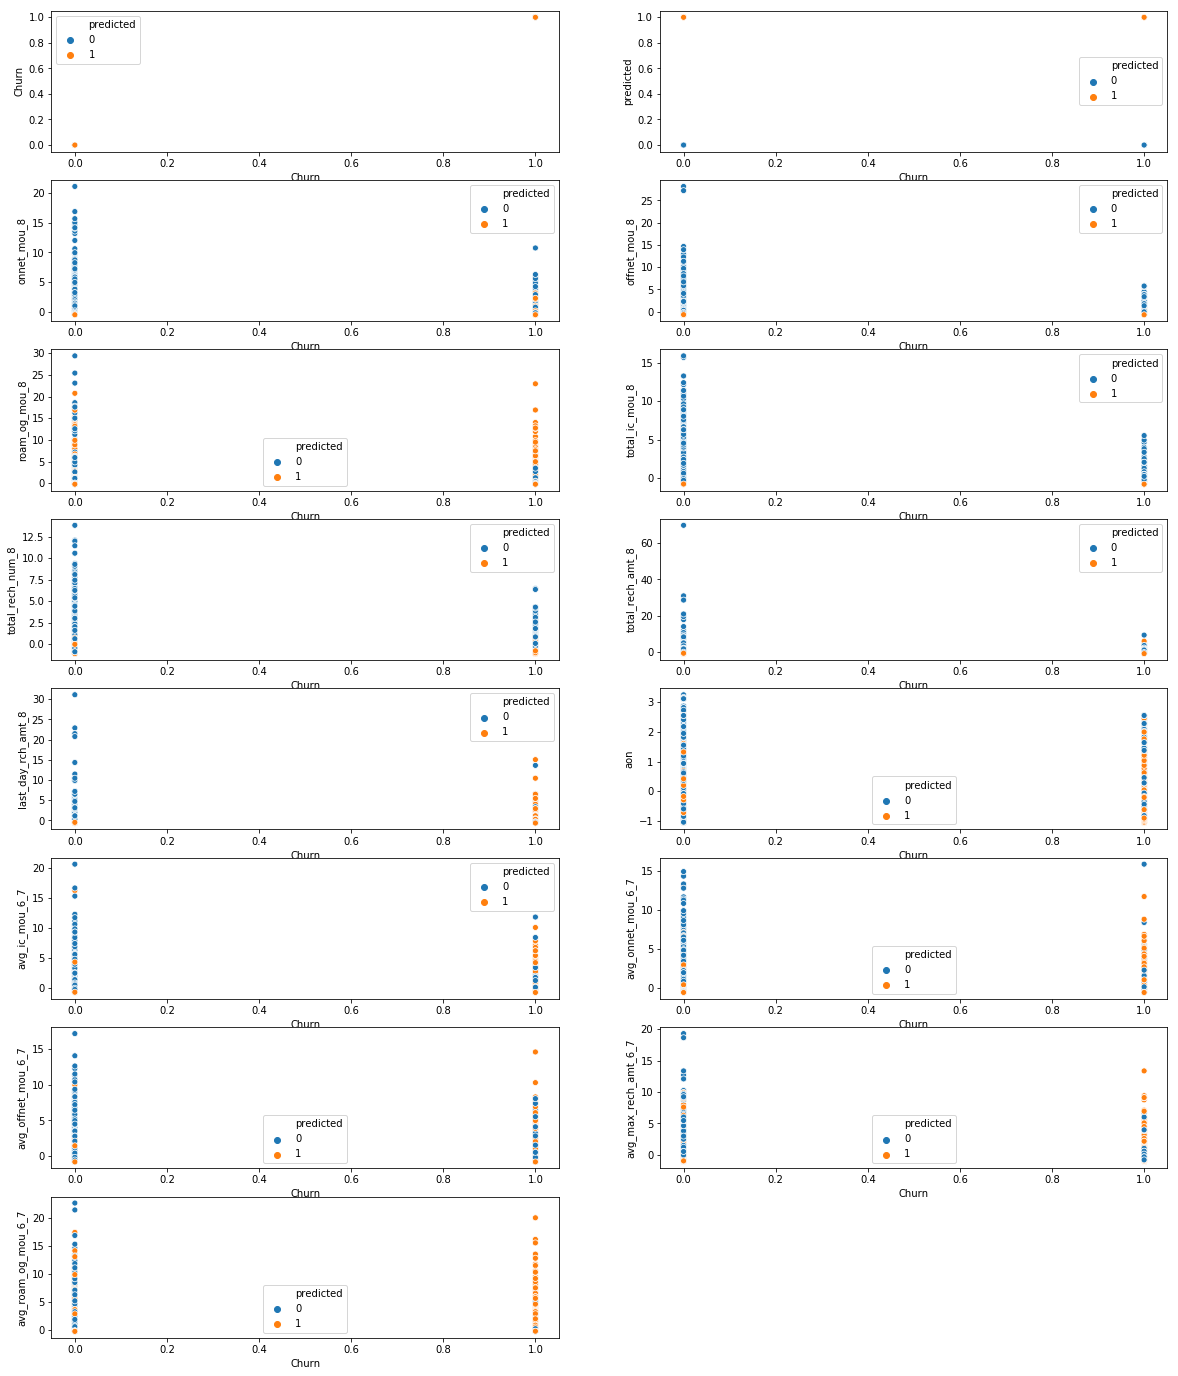

In [147]:
def scatter_plot(Y,X):
    sns.scatterplot(Y,X,hue='predicted',data=x_train) 
        
i=1
plt.figure(figsize=(20,40))

for col in x_train.columns: 
    if(i<=len(x_train.columns)):
        plt.subplot(13,2,i)
        scatter_plot('Churn',col)
        i=i+1

### Top indicators of churn 

In [148]:
X_LM_Train[variablelist].columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'avg_ic_mou_6_7', 'avg_onnet_mou_6_7', 'avg_offnet_mou_6_7',
       'avg_max_rech_amt_6_7', 'avg_roam_og_mou_6_7'],
      dtype='object')

##### Calls in all network in good phase

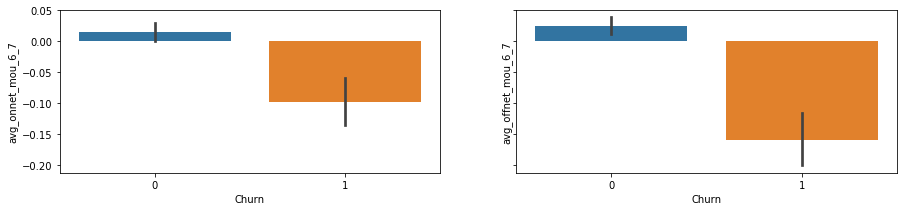

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["avg_onnet_mou_6_7"], ax=ax1);
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["avg_offnet_mou_6_7"], ax=ax2);

##### Calls in all network in action phase

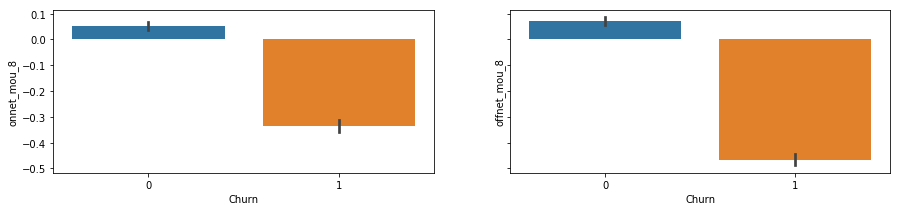

In [150]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["onnet_mou_8"], ax=ax1);
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["offnet_mou_8"], ax=ax2);

##### Observation: 
Customers reduce all kind of calls within the same operator network/ outside the operator T network are likely to churn... This is one of the major indicators.
##### Recommendations :
Offering discounts on call rates for within the same network/outside the operator T network would prove fruitful 

#### Recharge pattern in good phase

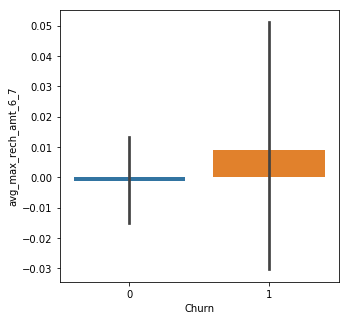

In [151]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["avg_max_rech_amt_6_7"], ax=ax1);

#### Recharge pattern in action phase

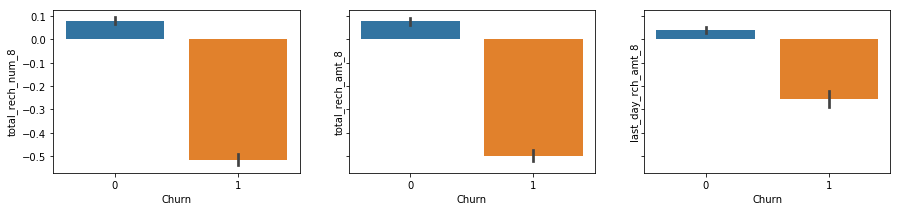

In [152]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["total_rech_num_8"], ax=ax1);
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["total_rech_amt_8"], ax=ax2);
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["last_day_rch_amt_8"], ax=ax3);

##### Observation: 
Customers reduce the number of recharges made/ reduce the amount of recharge, they are mostly likely to churn.
Customers recharging closer to the recharge date is also a risk for churn.
##### Recommendations :
Offer better recharge packages during good phase would attract customers to stay on the same network 

#### Incoming calls in good phase

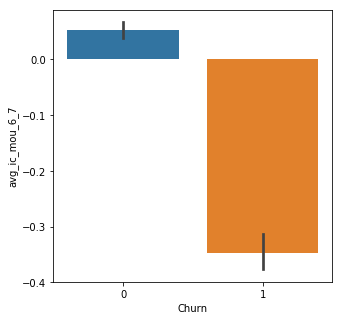

In [153]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["avg_ic_mou_6_7"], ax=ax1);

#### Incoming calls in   action phase

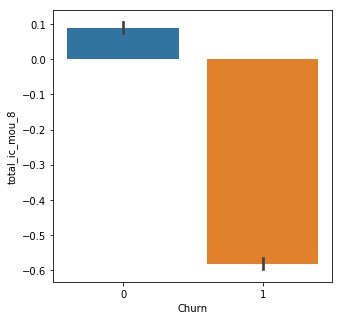

In [154]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["total_ic_mou_8"], ax=ax1);

##### Observation: 
Customers drastically reduce their incoming calls in both the action and good phase
##### Recommendations :
Offer better call packages during good phase would attract customers to stay on the same network 

#### Age on network

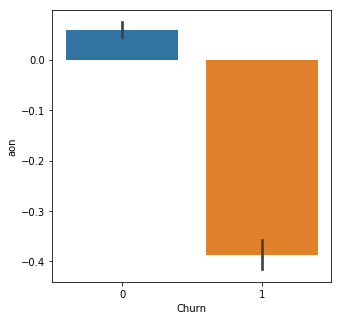

In [155]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["aon"], ax=ax1);

##### Observation: 
Tenured customers tend to churn less than newer customerts
##### Recommendations :
Roll out special offers for tenured customers to retain them and for newer customers, offer surprise offers(customer anniversary offer for instance) on completion of certain months/years with the network so that they look forward to completing those milestones and stay longer.

#### Roaming outgoing call pattern in good phase

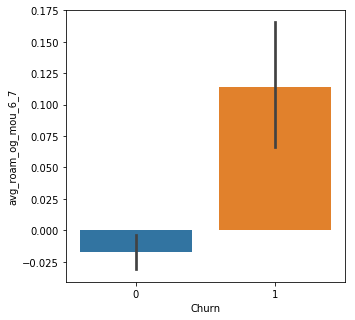

In [156]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["avg_roam_og_mou_6_7"], ax=ax1);

#### Roaming outgoing call pattern in action phase

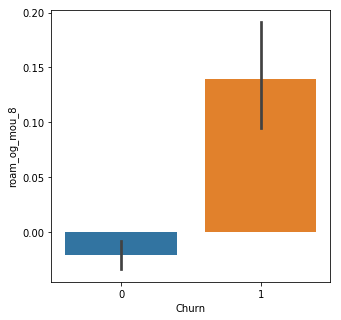

In [157]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
sns.barplot(x=y_train_pred_final["Churn"], y=x_train_sm["roam_og_mou_8"], ax=ax1);

##### Observation: 
Churners seem to be on roaming more than non-churners
##### Recommendations :
Offer better call roaming packages to customers whose roaming call minutes of usage is higher.

The important predictors are:

1. Age on network 'aon'
2. Average incoming call minute of usage during good phase & acion phase 'avg_ic_mou_6_7'and 'total_ic_mou_8' 
3. All kind of calls outside the operator T network  "avg_onnet_mou_6_7" and "onnet_mou_8" during good and action phase &
   within the same operator network during good phase and actio phase "avg_offnet_mou_6_7" and "offnet_mou_8"
4. Roaming outgoing calls minute of usage during action phase and good phase'roam_og_mou_8' & "avg_roam_og_mou_6_7"
5. Average maximum recharge amount during good phase 'avg_max_rech_amt_6_7'
6. Last day recharge amount during action phase "last_day_rch_amt_8"
7. Total recharge amount during action phase wrt "total_rech_amt_8"
8. Total recharge number during action phase "total_rech_num_8"
